In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj <- as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [5]:
random_walk_tele = function (g, num_steps, start_node, alpha, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    t=""
    for(i in 1:num_steps){
        #fprintf('Step %d: %d %s\n', i, v, t)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        if (rand()>=alpha){
        v = sample(1:vcount(g), 1, prob = PMF)
            t=""
        } else {
        v = sample(1:vcount(g), 1)
            t="teleport"
        }
    }
    
    return(v)
}

In [6]:
g <- barabasi.game(1000,m=4, directed=T)

In [7]:
numreps=1
v_last=numeric(vcount(g))
for(i in 1:100){
    #for(j in 1:numreps25){
    x = random_walk(g, 15, i)
    v_last[x]=v_last[x]+1
    #}
}
v_last=v_last/(vcount(g)*numreps)
v_last

[1] 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  [19] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  [37] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  [55] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  [73] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  [91] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [109] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [127] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [145] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [163] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [181] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [199] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [217] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [235] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [253] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [271] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [289] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [307] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [325] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [343] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [361] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [379] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [397] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [415] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [433] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [451] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [469] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [487] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [505] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [523] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [541] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [559] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [577] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [595] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [613] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [631] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [649] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [667] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [685] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [703] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [721] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [739] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [757] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [775] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [793] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [811] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [829] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [847] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [865] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [883] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [901] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

In [8]:
numreps=1
v_last=numeric(vcount(g))
for(i in 1:vcount(g)){
    for(j in 1:numreps){
    x = random_walk_tele(g, 15, i,.15)
    v_last[x]=v_last[x]+1
    }
}
v_last=v_last/(vcount(g)*numreps)
v_last

[1] 0.613 0.054 0.026 0.017 0.004 0.003 0.001 0.009 0.007 0.000 0.010 0.001
  [13] 0.001 0.000 0.000 0.000 0.000 0.000 0.003 0.001 0.004 0.002 0.002 0.004
  [25] 0.000 0.008 0.001 0.000 0.005 0.001 0.001 0.000 0.000 0.000 0.000 0.000
  [37] 0.000 0.000 0.002 0.003 0.003 0.000 0.000 0.002 0.004 0.004 0.000 0.000
  [49] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.003 0.001 0.000 0.000 0.000 0.001 0.001 0.000
  [73] 0.002 0.002 0.001 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.001
  [85] 0.000 0.000 0.002 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [97] 0.000 0.000 0.001 0.002 0.002 0.002 0.000 0.000 0.001 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.000
 [133] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000
 [157] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000
 [169] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.001
 [181] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.003 0.001 0.001
 [193] 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [205] 0.000 0.001 0.001 0.002 0.000 0.001 0.000 0.002 0.000 0.000 0.000 0.000
 [217] 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [229] 0.001 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [241] 0.000 0.001 0.000 0.000 0.002 0.001 0.001 0.000 0.000 0.001 0.000 0.001
 [253] 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [265] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [277] 0.000 0.001 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [289] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [301] 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [313] 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001
 [325] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [337] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.001 0.001 0.001 0.000 0.000
 [349] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000
 [361] 0.000 0.000 0.000 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [373] 0.000 0.000 0.000 0.001 0.000 0.000 0.002 0.000 0.000 0.000 0.001 0.000
 [385] 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.001
 [397] 0.000 0.000 0.002 0.001 0.000 0.001 0.001 0.000 0.000 0.001 0.000 0.001
 [409] 0.000 0.000 0.000 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.001
 [421] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [433] 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [445] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [457] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [469] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [481] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [493] 0.000 0.001 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000
 [505] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.000
 [517] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [529] 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [541] 0.000 0.000 0.002 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [553] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.002 0.000 0.000
 [565] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000
 [577] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [589] 0.000 0.000 0.000 0.002 0.000 0.002 0.000 0.001 0.000 0.000 0.000 0.000
 [601] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.00

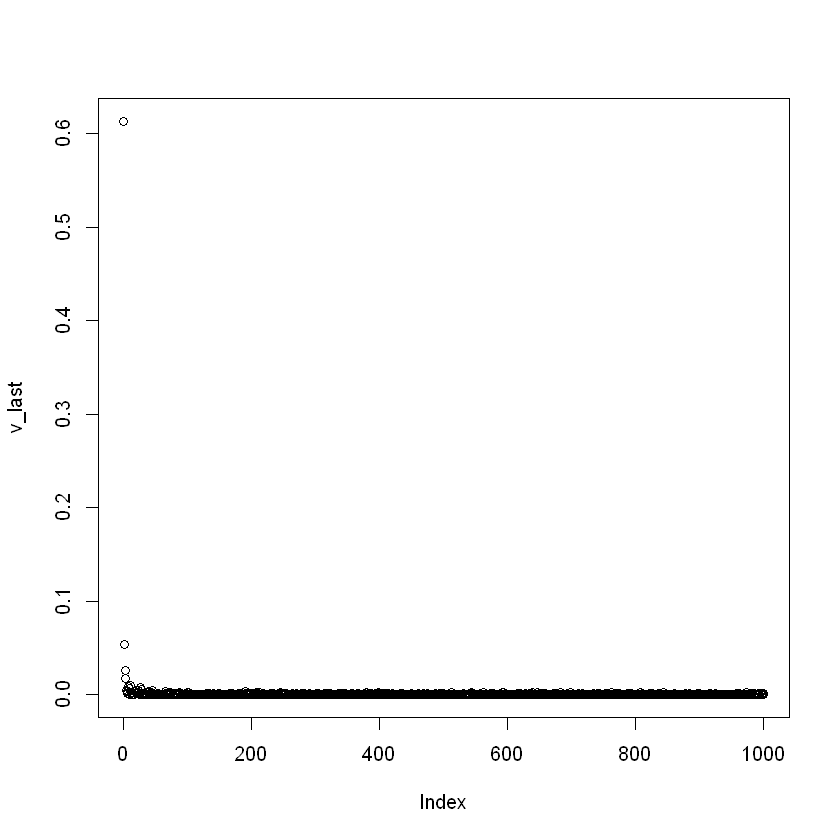

In [9]:
plot(v_last)